# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [1]:
import numpy as np
pi = np.pi
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')
%matplotlib notebook

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [16]:
from scipy.special import gamma
def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R по явной формуле

    --------
    Arguments:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Returns:
    V - float, объем сферы
    """
    V = pi**(D/2)/ gamma(1+D/2) * R**(D)
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

In [17]:
print('Get_voliume:',[getSphereVolumeExact(_) for _ in [1, 2, 3]])
print('My knowns:',[2, pi, 4/3*pi])

Get_voliume: [2.0, 3.141592653589793, 4.188790204786391]
My knowns: [2, 3.141592653589793, 4.1887902047863905]


<IPython.core.display.Javascript object>


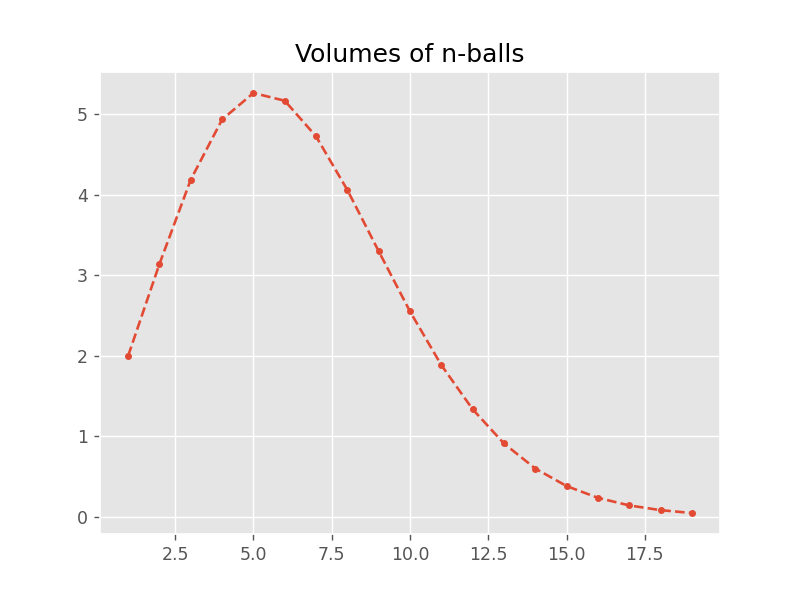

In [18]:
plt.figure()
plt.title('Volumes of n-balls')
dims = np.arange(1, 20)
plt.plot(dims, getSphereVolumeExact(dims),'.--')

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [19]:
def inside(p, R=1):
    return np.asarray(np.sum(p**2, axis=1) < R*R, dtype=np.int0)

def getSphereVolumePseudorandom(n=50, d=2, r = 1):
    rndm = np.random.RandomState(455)
    points = rndm.uniform(low=0, high=1, size=(n, d))
    m = np.sum(inside(points))
    v = m / n * 2**d
    return v * r**d

Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

<IPython.core.display.Javascript object>


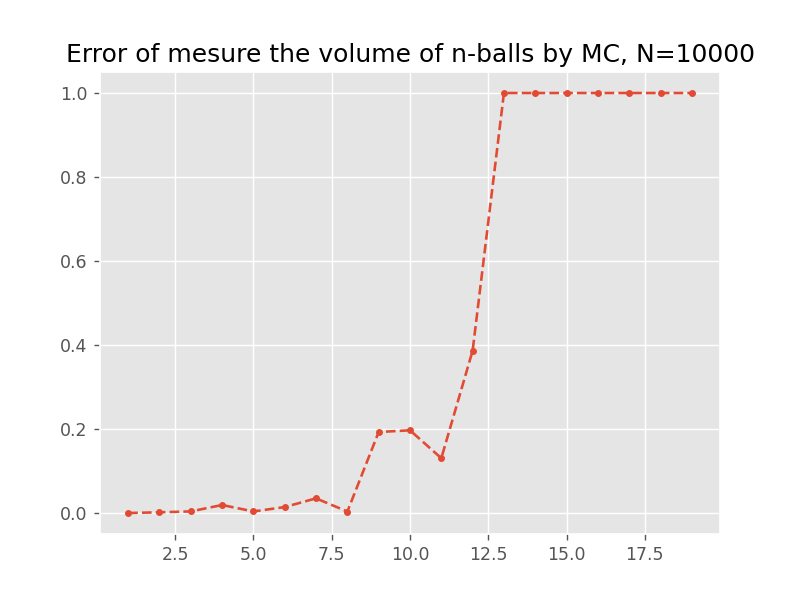

[2.     3.1468 4.2048 5.0288 5.2832 5.0944 4.8896 4.0448 2.6624 2.048
 1.6384 0.8192 0.     0.     0.     0.     0.     0.     0.    ]


In [21]:
plt.figure()
N=10000
plt.title(f'Error of mesure the volume of n-balls by MC, N={N}')
dims = np.arange(1, 20)
rnd_vols = [getSphereVolumePseudorandom(n=N,d=dim) for dim in dims]
rnd_vols = np.array(rnd_vols)
exc_vols = getSphereVolumeExact(dims)
e = (exc_vols - rnd_vols) / exc_vols
print(rnd_vols)
plt.plot(dims, abs(e),'.--')
#plt.yscale('log')

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [8]:
#!pip install sobol_seq <-- uncomment to install sobol_seq
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [11]:
sobol_seq.i4_sobol_generate?

In [57]:
def getSphereVolumeQuasirandom(n=10, d=2, r = 1):
    points = sobol_seq.i4_sobol_generate(d, n)
    m = np.sum(inside(points))
    v = m / n * 2**d
    return v * r**d

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

<IPython.core.display.Javascript object>


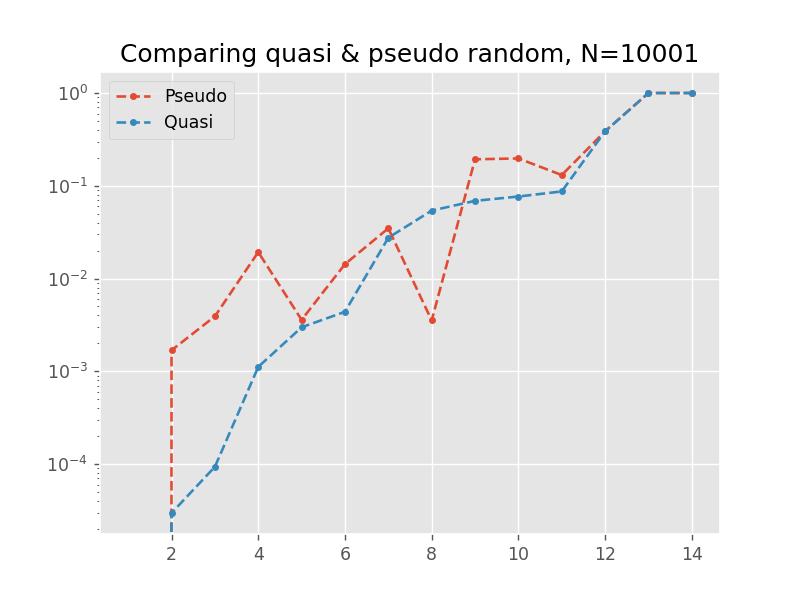

In [35]:
plt.figure()
N=10001
plt.title(f'Comparing quasi & pseudo random, N={N}')

dims = np.arange(1, 15)

ps_vols = [getSphereVolumePseudorandom(n=N,d=dim) for dim in dims]
ps_vols = np.array(ps_vols)


qs_vols = [getSphereVolumeQuasirandom(n=N,d=dim) for dim in dims]
qs_vols = np.array(qs_vols)

exc_vols = getSphereVolumeExact(dims)

e_ps = (exc_vols - ps_vols) / exc_vols
e_qs = (exc_vols - qs_vols) / exc_vols
plt.plot(dims, abs(e_ps),'.--',label='Pseudo')
plt.plot(dims, abs(e_qs),'.--',label='Quasi')

plt.yscale('log')
plt.legend()

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

Кажестя что, до тех пор, пока точность приемлимая ($\sim$1%), то соболевская последовательность явно лучше, а после, когда в шаравую область попадает в любом случае недостаточно точек - различие стирается.
Just for fun, сравним ещё с одной квазислучайной последовательностью $\mathbf{R}$

In [58]:
def phi(d): 
    x = 2.0000 
    for i in range(10): 
        x = pow(1+x,1/(d+1)) 
    return x
def get_r_d(d=2, n=10):
    g = phi(d)
    alpha = np.zeros(d) 
    for j in range(d): 
        alpha[j] = pow(1/g,j+1) %1 
    z = np.zeros((n, d)) 
    seed=0
    for i in range(n):
        z[i] = seed + alpha*(i+1)
    z = z %1
    return z

In [59]:
def getSphereVolumeQuasirandom_r(n=10, d=2, r = 1):
    points = get_r_d(d, n)
    m = np.sum(inside(points))
    v = m / n * 2**d
    return v * r**d

<IPython.core.display.Javascript object>


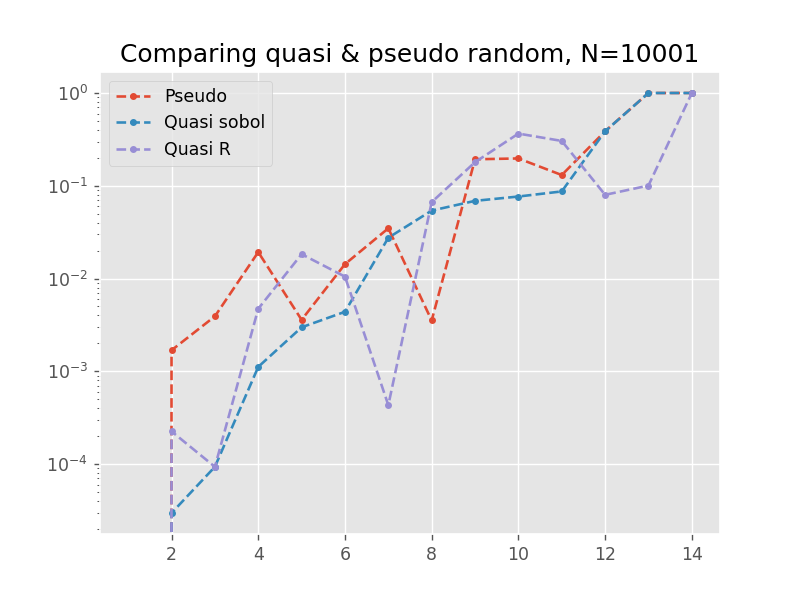

In [61]:
plt.figure()
N=10001
plt.title(f'Comparing quasi & pseudo random, N={N}')

dims = np.arange(1, 15)

ps_vols = [getSphereVolumePseudorandom(n=N,d=dim) for dim in dims]
ps_vols = np.array(ps_vols)


qs_vols = [getSphereVolumeQuasirandom(n=N,d=dim) for dim in dims]
qs_vols = np.array(qs_vols)

qsr_vols = [getSphereVolumeQuasirandom_r(n=N,d=dim) for dim in dims]
qsr_vols = np.array(qsr_vols)

exc_vols = getSphereVolumeExact(dims)

e_ps = (exc_vols - ps_vols) / exc_vols
e_qs = (exc_vols - qs_vols) / exc_vols
e_qsr = (exc_vols - qsr_vols) / exc_vols

plt.plot(dims, abs(e_ps),'.--',label='Pseudo')
plt.plot(dims, abs(e_qs),'.--',label='Quasi sobol')
plt.plot(dims, abs(e_qsr),'.--',label='Quasi R')


plt.yscale('log')
plt.legend()

## Задание 2

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [2]:
def getInitialState(N, rndm_state=1338):
    rndm = np.random.RandomState(rndm_state)
    state = rndm.choice(a=[-1, 1], size=(N, N))  
    return state, rndm

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [3]:
def getDeltaE(i, j, state):
    n=state.shape[0]
    current_e =  - state[i,j] *(state[(i-1) % n,j] + state[(i+1) % n, j] + state[i,(j-1) % n] + state[i,(j+1) % n]) 
    return -2 * current_e

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [4]:
exp=np.exp

def makeOneFlip(i, j, state, t, rndm):
    dE = getDeltaE(i, j, state)
    if (dE < 0) or (rndm.choice(a=[True, False],size=1, p=[exp(-dE/t), 1 - exp(-dE/t)])):
        state[i,j]=-state[i,j]
    
def makeFlip(t, state, rndm):
    n = state.shape[0]
    for num in rndm.permutation(n*n):
        i = num // n 
        j = num % n
        makeOneFlip(i, j, state, t, rndm)

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [5]:
def getEnergy(state):
    right = np.inner(state.reshape(-1) , np.roll(state, -1, axis=1).reshape(-1))
    up = np.inner(state.reshape(-1) , np.roll(state, -1, axis=0).reshape(-1))
    E = -np.sum(up+right)
    return E 

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [6]:
def getMagnetization(state):    
    return np.sum(state)

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [18]:
N       = 10         # размер решетки NxN
Nt      = 20         # количество точек температуры
eqSteps = 400        # количество раз выполнения makeFlip для установления равновесия
steps   = 50         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

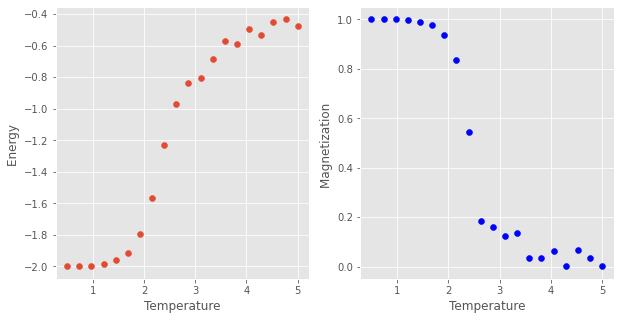

In [19]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state, rndm = getInitialState(N,rndm_state=11)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state, rndm)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state, rndm)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

### Ой, да какая тут физика - так игрушки, я могу столько моделей напридумывать с нужными скачками значений/производных.. 
Но так грубо - да, что-то описывает, судя по всему энергия не рвется, а вот намагниченность испытывает резкий разрыв, как при переходе ферромагнетика в парамагнетик. Но откуда брать обменные штуки не очень понятно, плюс вся картинка сильно зависит от `random_state`, так что даже на асимтотику на больших температурах не посмотришь(речь по закон Кюри)

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

In [7]:
N = 64
state, rndm = getInitialState(N)

Text(0.5, 1.0, 'Initial state')

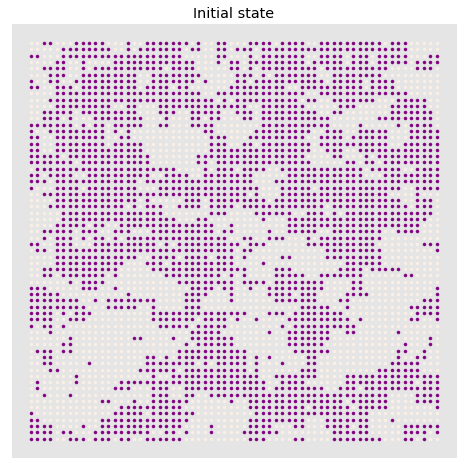

In [17]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
def draw_state():
    plt.figure(figsize=(8,8))
    i = np.arange(N)
    i,j = np.meshgrid(i,i)
    m = state > 0
    plt.scatter(i[m],j[m],c='linen', marker='.')
    plt.scatter(i[~m],j[~m],c='purple', marker='.')
    plt.xticks([])
    plt.yticks([])
draw_state()
plt.title('Initial state')

In [14]:
%matplotlib inline
@interact_manual(t=(0.5, 3.5, 0.5), eqSteps=(1, 500, 1))
def flip_state(t, eqSteps):
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(t, state, rndm)
    draw_state()

interactive(children=(FloatSlider(value=2.0, description='t', max=3.5, min=0.5, step=0.5), IntSlider(value=250…

<IPython.core.display.Javascript object>


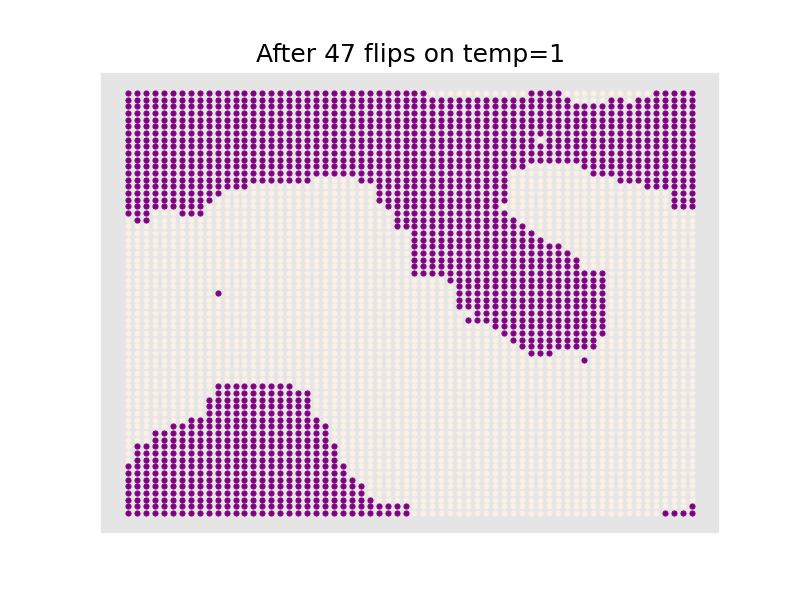

Text(0.5, 1.0, 'After 47 flips on temp=1')

In [10]:
draw_state()
plt.title('After 47 flips on temp=1')

<IPython.core.display.Javascript object>


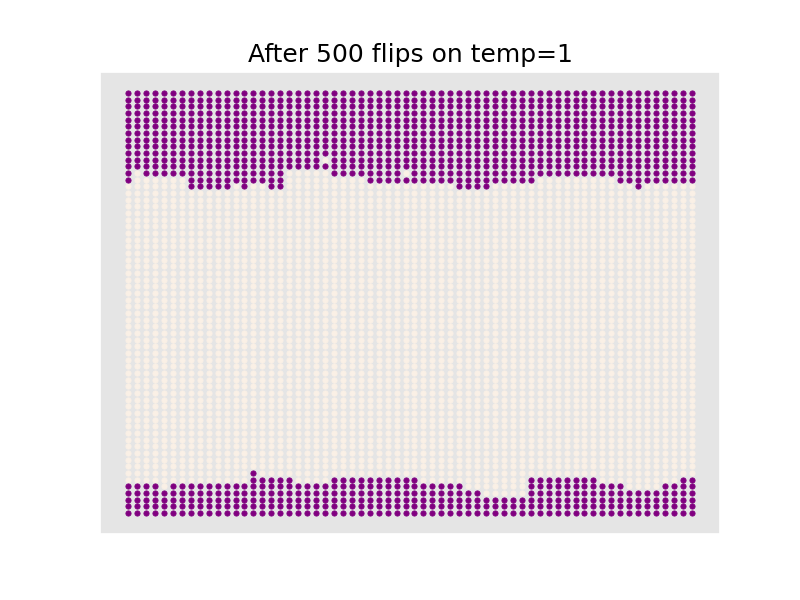

Text(0.5, 1.0, 'After 500 flips on temp=1')

In [11]:
draw_state()
plt.title('After 500 flips on temp=1')

<IPython.core.display.Javascript object>


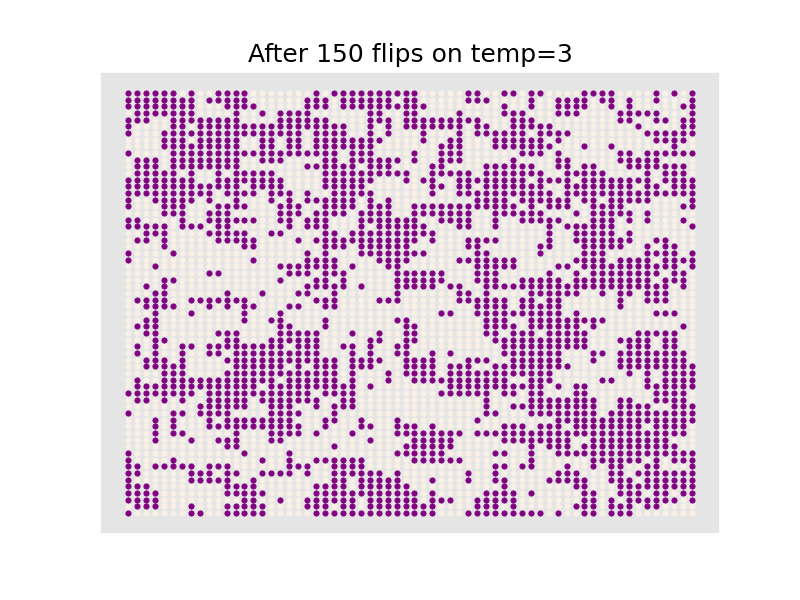

Text(0.5, 1.0, 'After 150 flips on temp=3')

In [12]:
draw_state()
plt.title('After 150 flips on temp=3')

<IPython.core.display.Javascript object>


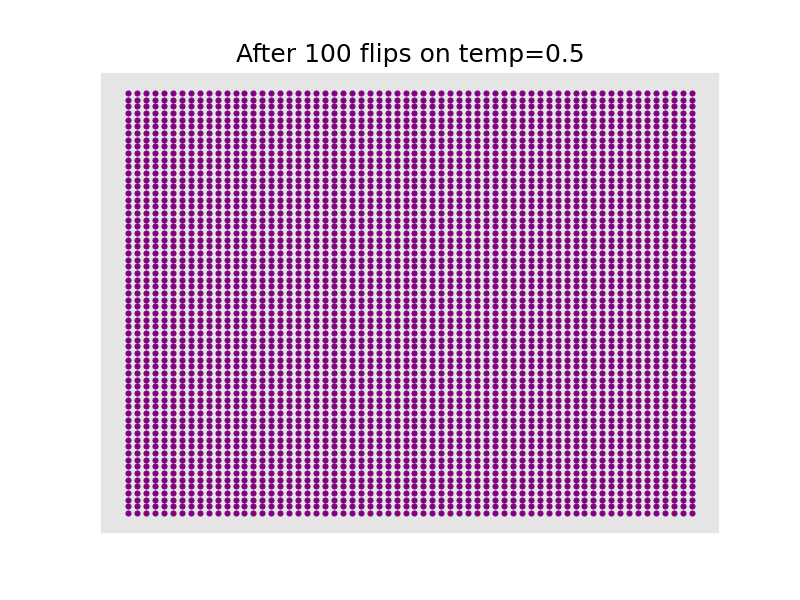

Text(0.5, 1.0, 'After 100 flips on temp=0.5')

In [13]:
draw_state()
plt.title('After 100 flips on temp=0.5')

Text(0.5, 1.0, 'After 30 flips on temp=2.5')

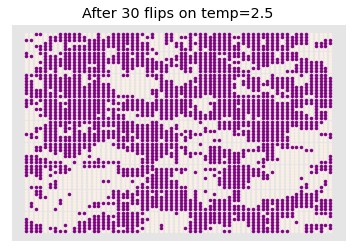

In [16]:
draw_state()
plt.title('After 30 flips on temp=2.5')

Пограв в эту чудесную игру, мы видим, что низкая температура выстравивает все в два крупных домена, т.ч. энергия почти минимальна, и отличается от минимальной только за счет поверхностных эффектов, вероятность <<неправильного>> перехода с положительной энергией мала, причем при увеличении числа итераций система рано или поздно приходит в однородное состояне, однако оказывается возможной довольно устойчивой картинка с двумя зонами, разделнными соответсвенно двумя прямыми, так оказывается из-за того, что граничным ячейкам вобщм то всё равно какими быть.
А вот около фазового перехода вещи вовсем интресены среди порядка появляются локальные базы другого спина..
А вот для большой температуры наоборот вероятность случайного неправильного перехода существенна, поэтому картинка разбивается на очень много класстеров, из-за чего энегия оказывается существенно больше..